>>ARCHIVOS FUENTE PARA LA REALIZACIÓN DEL SCRIPT OBTENER MAPA ADC

El script genera el mapa ADC a partir de dos imagenes de RM ponderadas por difusion (b=0 y b=x).
**Las imagenes han sido tomadas del tutorial DIPY.

**En este tutorial hemos visto que para obtener el valor b, se deben aplicar un gradiente en los tres ejes de coordenadas, y posteriormente combinarlas en una sola imágen isotrópica.
Los cálculos han sido realizados mediante las funciones de la librería MedPy.

Código de GitHub Juan Pablo --> https://github.com/jpabloqbt/idiffusion.git
Instalación de librerias mediante ANACONDA:
-> conda config --add channels conda-forge
-> conda install nibabel
-> conda install -c conda-forge dipy
-> conda install -c conda-forge jupyterlab
-> conda install -c conda-forge notebook

Código "Getting started with DIPY" para obtención de fichero de imagenes, valores b, y coordenadas de los diferentes gradientes aplicados para los valores de b.

Código para cálculo del mapa ADC --> https://github.com/loli/medpy.git 
Debemos instalar MedPy:
-> pip install MedPy
MedPy es una libreria para el procesamiento de imagenes médicas en Python. Proporciona funciones básicas de lectura, escritura y manipulaciones de grandes imagenes de dimensión arbitraria.
**Este código lo he utilizado para lidiar con los valores de 0 en las imagenes y evitando errores de cálculo. Para ello se utiliza el método Otsu para definir una máscara y hacer todos los valores por debajo de un umbral sean igual a 0 y realizar los cálculos sólo con la intensidad de los valores por encima de ese umbral.

Para calcular el mapa de ADC, he utilizado la ecuación simplificada mencionada en el documento word compartido:
    ADC=(-1/b)*ln(S1/S0)

In [1]:
#IMPORTACIÓN DE LIBRERÍAS
#librería para trabajar con el sistema
import os
#combinar rutas. El "as" cambia el nombre al que nosotros elijamos para hacerlo más intuitivo
import os.path as op
#librería para cálculo numérico
import numpy as np
#librería para trabajar con imagenes neurologicas
import nibabel as nib
#representación en python
import matplotlib.pyplot as plt
#DIPY proporciona herramientas para cargar y procesar ficheros de imagenes médicas además de acceso a BBDD.
from dipy.data import fetch_sherbrooke_3shell
fetch_sherbrooke_3shell()
#Para acceder a los ficheros ubicados en el directorio de descarga
from os.path import expanduser, join
home = expanduser('~')

In [2]:
#Librería para el procesamiento de imagenes médicas mediante diferentes funciones que nos interesan.
import numpy
from scipy.ndimage.morphology import binary_fill_holes, binary_dilation,\
    binary_erosion

In [69]:
# Cargar un conjunto de imagenes
#img = nib.load(op.join(os.getcwd(), 'inputs', 'ADC.nii.gz'))
#img = nib.load(op.join(os.getcwd(), 'inputs', 'IXI_519_DTI.nii.gz'))
#tienen que tener extension .nii o .gz
#data = img.get_fdata()
#print("Image shape:", data.shape)
#print("Voxels size:", img.header.get_zooms())

In [154]:
#CÓDIGO CON LOS VALORES/VECTORES DE B

# dname contiene el nombre del directorio que contiene los 3 archivos .
dname = join(home, '.dipy', 'sherbrooke_3shell')
#Imagenes con las que trabajaremos obtenidos para unos valores b y de gradiente dados.
fdwi = join(dname, 'HARDI193.nii.gz')
#Valores b
fbval = join(dname, 'HARDI193.bval')
#Vectores de los diferentes gradientes utilizados para cada valor de b.
fbvec = join(dname, 'HARDI193.bvec')

#Para cargar datos de un archivo nifti
from dipy.io.image import load_nifti 
#Para guardar un nuevo archivo nifti
from dipy.io.image import save_nifti
#carga los datos de difusion almacenados en fdwi.
data, affine, img = load_nifti(fdwi, return_img=True) 
#print(data.shape) SI QUEREMOS SABER LA DIMESION DE LA IMAGEN Y EL NUMERO DE GRADIENTES TOMADOS EN TOTAL

In [155]:
# Se cargan los valores de b y vectores de b. Se utiliza la función de DIPY read_bvals_bvecs.
from dipy.io import read_bvals_bvecs
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

In [156]:
#El objeto gradient_table contiene todos los parámetros de la adquisición.
from dipy.core.gradients import gradient_table
#Función para crear gradientes MR-DWI.
gtab = gradient_table(bvals, bvecs) 

In [157]:
#Se muetran los valores de intensidad  de  la  ponderación  de  difusión  b  para  cada  dirección gradiente.
print(gtab.bvals)

[   0. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 35

In [ ]:
#Se muestra la contribución específica de cada dirección del gradiente para obtener cada valor de difusión b. 
print(gtab.bvecs)

In [323]:
#Utilizo Matplotlib para visualizar los resultados.
#A continuación se muestran los cortes axiales medios de volumen 0 (b0) y volumen 10
import matplotlib.pyplot as plt
#Seleccionamos el corte axial justo en la mitad.
axial_middle = data.shape[2] // 2
#Obtenemos la imagen en T2* para ese corte axial.
S0 = data[:, :, axial_middle, 0].T
#Obtenemos la imagen para el valor b y su gradiente en la posición i de los ficheros obtenidos (bval y bvecs)
i=10 #Entre 1 - 192
Si = data[:, :, axial_middle, i].T
b = bvals[i]
grd = bvecs[i]   
# convertimos en datos flotantes ya que son más recomendables para las operaciones aritméticas.
S0 = S0.astype(numpy.float)
Si = Si.astype(numpy.float)

Gradiente utilizado: [ 0.50413  -0.846694  0.170183]


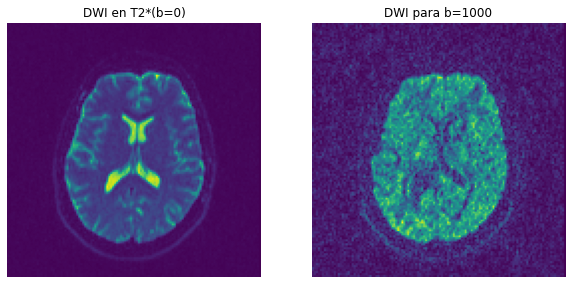

In [332]:
#En este apartado se representarán ambos cortes
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(S0, origin='lower') #para ponerlo en gris --> cmap='gray'
plt.title('DWI en T2*(b=0)')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(Si, origin='lower') 
plt.title('DWI para b=%d' %b)
print("Gradiente utilizado: %s" %grd)

Umbral Otsu:
Si la intensidad de un píxel en la imagen de entrada es mayor que un umbral, el píxel de salida correspondiente se marca como blanco (primer plano), y si la intensidad de la intensidad del píxel de entrada es menor o igual al umbral, se marca la ubicación del píxel de salida en negro (fondo).

Archivo guardado correctamente!


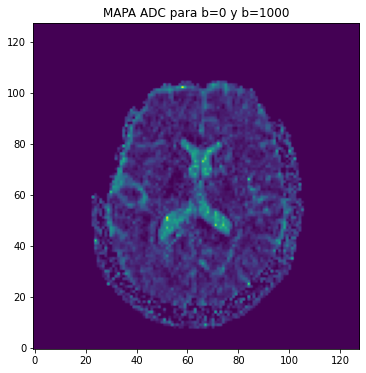

In [337]:
#CÓDIGO PARA CALCULAR EL MAPA ADC

#Importo las funciones necesarias de la libreria Medpy mencionada anteriomente.
import numpy
from medpy.io import load, save, header
from medpy.filter import otsu
from medpy.filter.binary import largest_connected_component

#Umbrales b0 + bx DWI para obtener las máscaras.
#La máscara de S0 evita la división por 0 y la máscara de Si evita los ceros para la computación del ln(x)
#Se eligen el umbral por defecto usando el método Otsu. [TU Hamburg code]
#Otsu Binarization: it automatically calculates a threshold value from image histogram for a bimodal image(Black or White).
S0thr = otsu(S0, 32) / 4. # Divide entre 4 para reducir el impacto. He realizado varias pruebas y con el umbral en el valor de pixel 32 se consigue una mejor resolución.
Sithr = otsu(S1, 32) / 4.
mask = binary_fill_holes(S0 > S0thr) & binary_fill_holes(Si > Sithr)
    
#Estos pasos de morfología binaria se realizan para seleccionar sólo el cerebro.
#Esta máscara delimitará las zonas de interés y centrarse en la zona cerebral.
mask = binary_erosion(mask, iterations=1)
mask = largest_connected_component(mask)
mask = binary_dilation(mask, iterations=1)

#Para ver el resultado de la máscara aplicada:
#plt.imshow(mask, cmap='gray', origin='lower')
       
#Computación del mapa ADC
#Declaración de la variables ADC del tamaño de S0 conteniendo 0's.
adc = numpy.zeros(S0.shape, S0.dtype)
#Ecuación para obtener el valor de ADC indicado en el punto 4 del documento word compartido
# en el modelo IVIM para promediar el gradiente en cada vóxel.
# ln(x)=np.log(x)
adc[mask]= (-1./b)*np.log(Si[mask] / S0[mask])
#Todos los valores negativos los hago 0 para reducir el brillo innecesario.
adc[adc < 0] = 0

#numpy.seterr(divide = 'ignore')
plt.figure(figsize=(10, 6))
plt.imshow(adc, origin='lower')
plt.title('MAPA ADC para b=0 y b=%d' %b)
#Guardamos la imágen obtenida.
save_nifti('ADC_MAP.nii.gz',adc, affine)
print('Archivo guardado correctamente!')

In [338]:
# Cargo la imagen del MAPA ADC obtenido
img = nib.load(op.join(os.getcwd(),'ADC_MAP.nii.gz')) #tienen que tener extension .nii o .gz
ADC_loaded = img.get_fdata()

Text(0.5, 1.0, 'MAPA ADC con valor de difusión b= 1000')

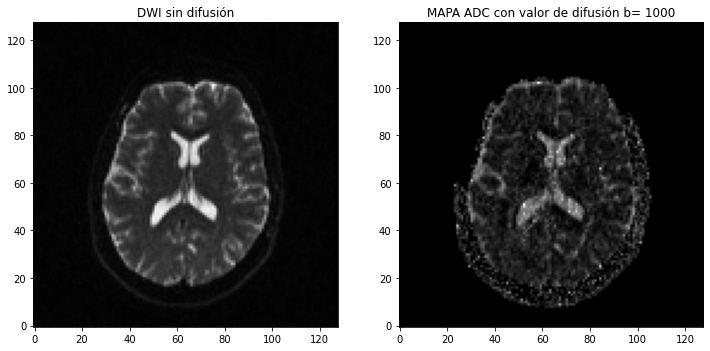

In [342]:
#VISUALIZACIÓN de la imagen leida en 2D.
plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)
plt.imshow(S0, cmap='gray', origin='lower')
plt.title('DWI sin difusión')
plt.subplot(1,2,2)
plt.imshow(ADC_loaded, cmap='gray', origin='lower')
plt.title('MAPA ADC con valor de difusión b= %d' %b)

Text(0.5, 1.0, 'MAPA ADC con valor de difusión b= 1000')

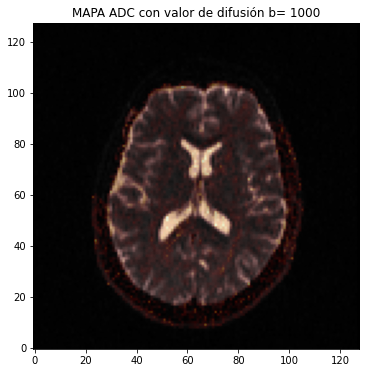

In [340]:
#VISUALIZACIÓN de la imagen leída en 2D.
plt.figure(figsize=(6, 6))
plt.subplot(1,1,1)
plt.imshow(S0, cmap='gray', origin='lower')
plt.imshow(ADC_loaded, cmap='afmhot', origin='lower', alpha=0.3)
plt.title('MAPA ADC con valor de difusión b= %d'%b)

In [341]:
#LECTURA de los metadatos de la imagen obtenida.
print(img.header)
print("Dimensión de la imagen 2D:", img.header.get_data_shape())
print("Tamaño del voxel:", img.header.get_zooms())
print("Valor de difusión b = %d s/mm2" %b)
print("Vector de gradiente(i,j,k): %s" %grd)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  2 128 128   1   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1. 2. 2. 2. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -128.02411
qoffset_y       : -97.02124
qoffset_z       : -73.61566
srow_x          : [   2.         0. 